In [2]:
import numpy as np

x = np.array([1, 2, 3])
print(x.__class__)
print(x.shape)  # 形状
print(x.ndim)  # 次元数

<class 'numpy.ndarray'>
(3,)
1


In [3]:
x = np.array([[1, 2, 3], [1, 2, 3]])
print(x.__class__)
print(x.shape)
print(x.ndim)

<class 'numpy.ndarray'>
(2, 3)
2


In [4]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])

# 要素ごとの演算
print(W + X)  # 配列の加算
print("-----")
print(W * X)  # アダマール積(要素ごとの積)

[[ 1  3  5]
 [ 7  9 11]]
-----
[[ 0  2  6]
 [12 20 30]]


In [5]:
# ベクトルの内積
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
y = np.dot(a, b)
print(y)
# 同じ計算
print(a @ b)

# 行列の積
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
Y = np.dot(A, B)
print(Y)
# 同じ計算
print(A @ B)

32
32
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [6]:
# 行列式
A = np.array([[3, 4], [5, 6]])
d = np.linalg.det(A)
print(d)

-1.9999999999999971


In [7]:
# 逆行列
A = np.array([[3, 4], [5, 6]])
B = np.linalg.inv(A)
print(B)
print("---")
print(A @ B)

[[-3.   2. ]
 [ 2.5 -1.5]]
---
[[ 1.0000000e+00 -8.8817842e-16]
 [ 0.0000000e+00  1.0000000e+00]]


In [8]:
def multivariate_normal(x, mu, cov):
    """多次元正規分布

    Args:
        x (_type_): 確率変数。(1,D)か(D,)形状のデータのみ
        mu (_type_): 想定する多次元正規分布の平均。(1,D)か(D,)形状のみ
        cov (_type_): 想定する多次元正規分布の共分散行列。(D,D)形状のみ

    Returns:
        _type_: 与えられた確率変数とパラメータに従う確率密度
    """
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

In [9]:
x = np.array([[0], [0]])
mu = np.array([[1], [2]])
cov = np.array([[1, 0], [0, 1]])

y = multivariate_normal(x, mu, cov)
print(y)

[[0.01306423]]


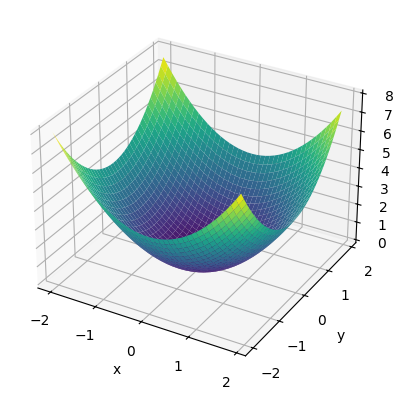

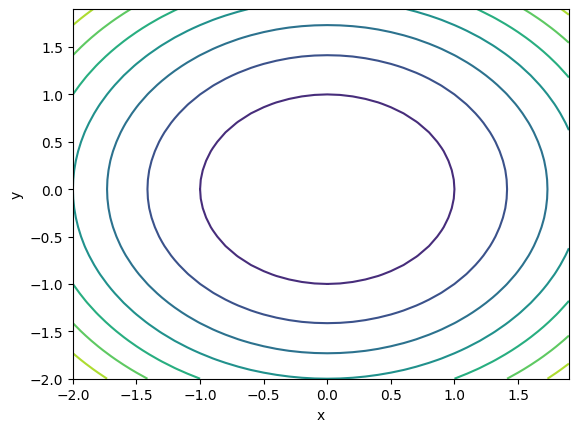

In [10]:
import matplotlib.pyplot as plt

if False:
    X = np.array(
        [
            [-2, -1, 0, 1, 2],
            [-2, -1, 0, 1, 2],
            [-2, -1, 0, 1, 2],
            [-2, -1, 0, 1, 2],
            [-2, -1, 0, 1, 2],
        ]
    )
    Y = np.array(
        [
            [-2, -2, -2, -2, -2],
            [-1, -1, -1, -1, -1],
            [0, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
            [2, 2, 2, 2, 2],
        ]
    )
else:
    # ===== better resolution =====
    x = y = np.arange(-2, 2, 0.1)
    X, Y = np.meshgrid(x, y)
    # =============================

Z = X**2 + Y**2

# projection="3d"により3d用グラフを指定
ax = plt.axes(projection="3d")
# viridisというカラーマップを使用
ax.plot_surface(X, Y, Z, cmap="viridis")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

# ===== plot contour =====
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

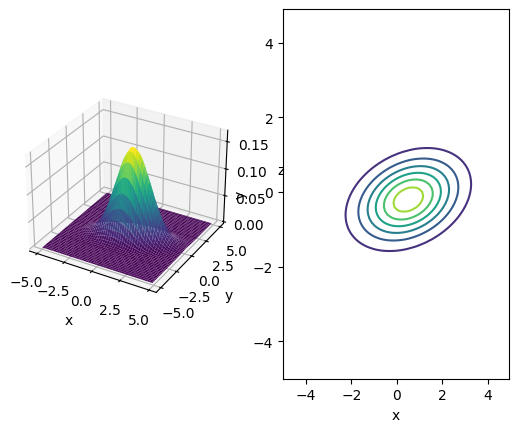

In [11]:
mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3], [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.plot_surface(X, Y, Z, cmap="viridis")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.contour(X, Y, Z)
plt.show()

In [13]:
# ダミーデータ作成
np.random.seed(0)
N = 10000
D = 2
xs = np.random.rand(N, D)  # 一様分布からダミーデータ

# axis=0で0番目の軸にそって和を求める。0番目の軸とは、(N,D)形状の場合、Nの軸（次元）を指す
mu = np.sum(xs, axis=0)
mu /= N

cov = 0

for n in range(N):
    x = xs[n]
    z = x - mu
    # 新しい軸を追加する。zは形状(D,)だが、z[:,np.newaxis]とすることで(D,1)になる
    z = z[:, np.newaxis]
    cov += z @ z.T

cov /= N
print(mu)
print(cov)

# ここまでの処理は以下のコードで代用可能
# mu = np.mean(xs, axis=0)
# cov = np.cov(xs, rowvar=False)

[0.49443495 0.49726356]
[[ 0.08476319 -0.00023128]
 [-0.00023128  0.08394656]]


(25000, 2)


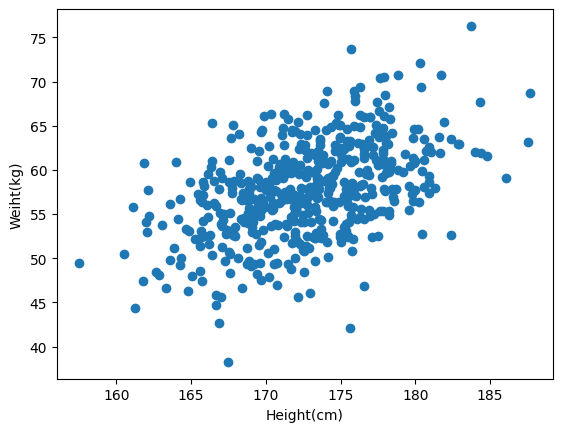

In [15]:
path = "./height_weight.txt"
xs = np.loadtxt(path)
print(xs.shape)

small_xs = xs[:500]
plt.scatter(small_xs[:, 0], small_xs[:, 1])
plt.xlabel("Height(cm)")
plt.ylabel("Weiht(kg)")

mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

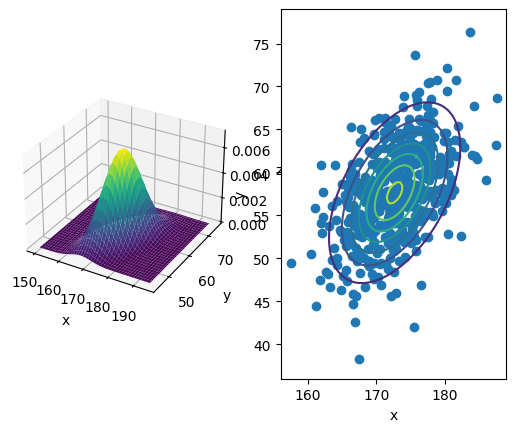

In [16]:
# Maximum Likelihood Estimation(MLE)
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)


def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y


small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5), np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.plot_surface(X, Y, Z, cmap="viridis")

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:, 0], small_xs[:, 1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)
plt.show()